# Importación de librerías

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import imblearn
import warnings

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from collections import Counter
from IPython.display import display 
from sklearn.metrics import mutual_info_score 
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
warnings.filterwarnings('ignore')

# Obtención del conjunto de datos

El siguiente proyecto emplea un conjunto de datos relacionados a la tasa de abandono.

In [5]:
df0 = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
df0.shape

(7043, 21)

In [7]:
df0.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Se puede apreciar que este conjunto de datos, inicialmente, posee una cantidad de 7043 registros con 21 variables. A continuación, se describen las columnas que componen el mismo:

<ul>
    <li>CustomerID => Identificación del cliente.</li>
    <li>Gender => Masculino/Femenino.</li>
    <li>Senior Citizen => Si el cliente es un jubilado (0/1).</li>
    <li>Partner => Si vive con una pareja.</li>
    <li>Dependents => Si tienen dependientes.</li>
    <li>Tenure => Número de meses desde el inicio del contrato.</li>
    <li>Phone service => Si tienen servicio telefónico.</li>
    <li>Multiple lines => Si tienen múltiples líneas telefónicas.</li>
    <li>Internet service => El tipo de servicio de Internet.</li>
    <li>Online security => Si la seguridad en línea está habilitada.</li>
    <li>Online backup => Si el servicio de copia de seguridad en línea está habilitado.</li>
    <li>Device protection => Si el servicio de protección del dispositivo está habilitado.</li>
    <li>Tech support => Si el cliente tiene soporte técnico.</li>
    <li>Streaming TV => Si el servicio de transmisión de TV está habilitado.</li>
    <li>Streaming movies => Si el servicio de streaming de películas está habilitado.</li>
    <li>Contract => El tipo de contrato.</li>
    <li>Paperless billing => Si la facturación es sin papel.</li>
    <li>Payment method => Método de pago.</li>
    <li>Monthly charges => La cantidad cobrada mensualmente.</li>
    <li>Total charges => El monto total cobrado.</li>
    <li>Churn => Si el cliente ha cancelado el contrato.</li>    
<ul>

# Depuración y limpieza de datos

Se presentan variables cuantitativas como "MonthlyCharges" y cualitativas de tipo nominal, entre ellas, "Gender". La variable objeto de estudio corresponde a "Churn", la cual se empleará para realizar las predicciones de tasa de abandono de los clientes mediante un modelo de clasificación usando regresión logística.

In [8]:
df0.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

De por sí, es evidente que no se encuentran datos nulos en el conjunto de datos, mas, habrá que corroborar la calidad de los datos, verificando el impacto de los datos duplicados al haber una columna referente al id de cada cliente (customerID). 

In [9]:
df0['customerID'].nunique()

7043

La cantidad de valores únicos es igual a la cantidad de registros, por ende, no se encuentran valores duplicados en esta columna.

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Realizando una revisión del tipo de dato de cada columna, se evidencia que la columna "TotalCharges" se comprende de valores flotantes pero su tipo corresponde a un "objeto". Para verificar si el casting es posible, se procede a evaluar el contenido de esta columna.

In [11]:
df0[df0.columns[-3:]].sample(5)

,MonthlyCharges,TotalCharges,Churn
5982,19.80,304.6,No
4481,40.15,1626.05,No
3172,95.90,2448.75,Yes
5208,59.45,780.85,No
1779,91.15,168.5,No


In [12]:
df0['TotalCharges'] = pd.to_numeric(df0['TotalCharges'], errors='coerce')

Se emplea la función "to_numeric" porque, si entre esos datos hay cadenadas de valores, se generaría una excepción ValueError. Esta función emplea el parámetro "errors" con el argumento "coerce", transformando así, los valores no numéricos a nulos.

In [13]:
df0.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df0['TotalCharges'] = df0['TotalCharges'].fillna(0) 

Y así, los valores nulos generados anteriormente, se transforman en 0.

In [15]:
df = df0.copy()

# Exploración de datos

Para poder realizar un análisis univariado y bivariado, siendo el abandono de clientes (Churn) nuestra variable objeto de estudio, es necesario que la vaiable mencionada pueda ser tratada como una variable cuantitativa. 

In [16]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int) 

Con el código anterior, se ha procedido a realizar la conversión de los datos, "Yes" y "No", a un "1" y "0", respectivamente.

In [17]:
round(df['Churn'].mean(), 3)

0.265

La media de nuestra variable objetivo es ≈0.265. Este dato será importante para el análisis de las demás variables.

In [18]:
mediaGlobal = df['Churn'].mean()

In [19]:
categoricas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
 'PhoneService', 'MultipleLines', 'InternetService', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
 'TechSupport', 'StreamingTV', 'StreamingMovies', 
 'Contract', 'PaperlessBilling', 'PaymentMethod'] 
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


La información estadistica anterior pertenece a las variables cuantitativas, donde se aprecia lo siguiente:

<ul>
    <li>En la variable "tenure", que corresponde al número de meses desde que inició el contrato, existe una media de ≈32, siendo su valor máximo de 72.</li>
    <li>Aunque el valor mínimo de "MonthlyCharges" sea de ≈18.25, el valor mínimo de "TotalCharges" es de 0. Esto se debe a la operación realizada anteriormente, donde se reemplazó con 0 los valores nulos.</li>
    <li>"SeniorCitizen" se excluye de este análisis, aun teniendo valores cuantitativos, debido a que la naturaleza de esta variable es cualitativa, en donde, se le ha aplicado un proceso de label encoding, convirtiendo las etiquetas No y Sí (para este caso), en 0 y 1, respectivamente.</li>
<ul>

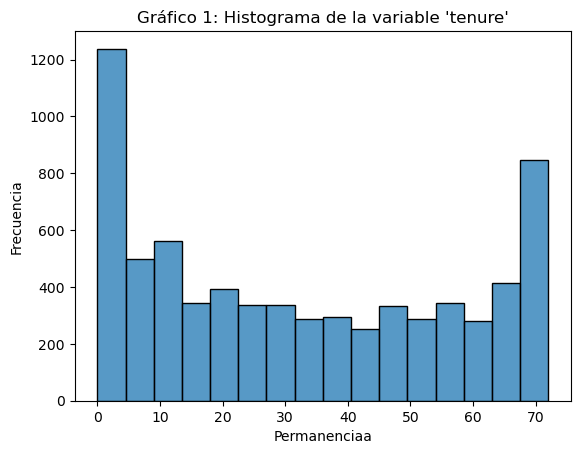

In [21]:
ax = sns.histplot(df['tenure'])
plt.title("Gráfico 1: Histograma de la variable 'tenure'")
plt.xlabel('Permanencia')
plt.ylabel('Frecuencia')
plt.show()

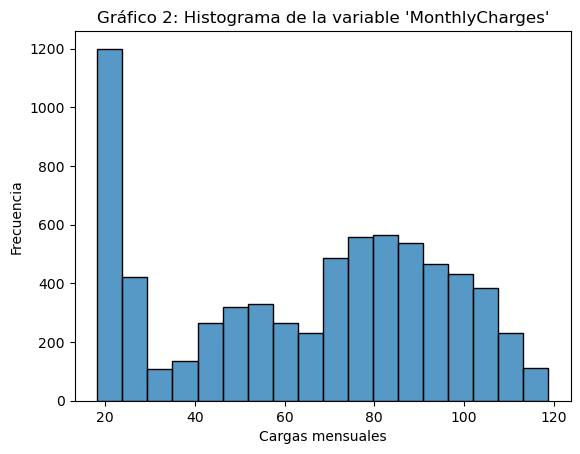

In [22]:
ax = sns.histplot(df['MonthlyCharges'])
plt.title("Gráfico 2: Histograma de la variable 'MonthlyCharges'")
plt.xlabel('Cargas mensuales')
plt.ylabel('Frecuencia')
plt.show()

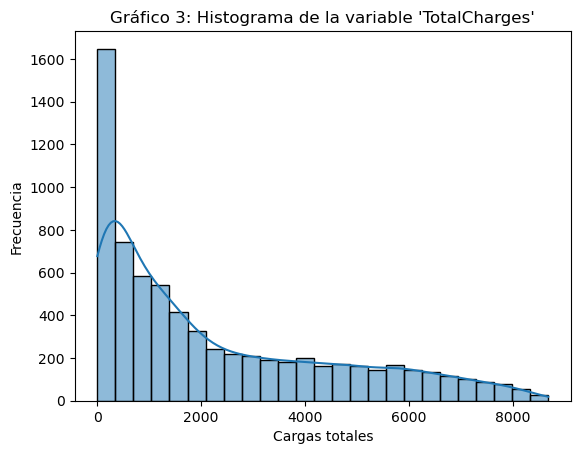

In [23]:
ax = sns.histplot(df['TotalCharges'], kde = True)
plt.title("Gráfico 3: Histograma de la variable 'TotalCharges'")
plt.xlabel('Cargas totales')
plt.ylabel('Frecuencia')
plt.show()

Los gráficos anteriores, pertenecientes a las variables cuantitativas, muestran la distribución de los datos para cada una. En "TotalCharges" se evidencia un sesgo hacia la derecha.

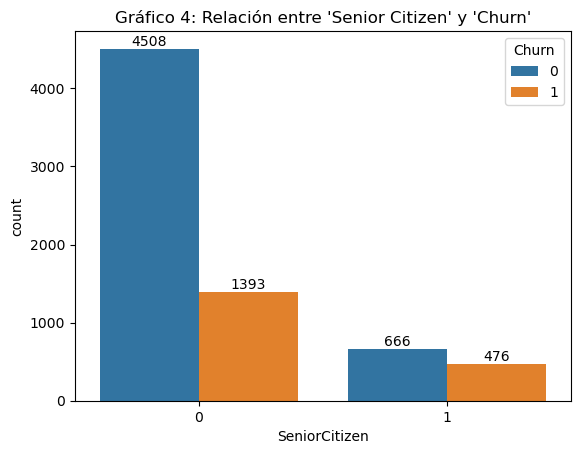

In [24]:
ax = sns.countplot(x = df['SeniorCitizen'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 4: Relación entre 'Senior Citizen' y 'Churn'")
plt.show()

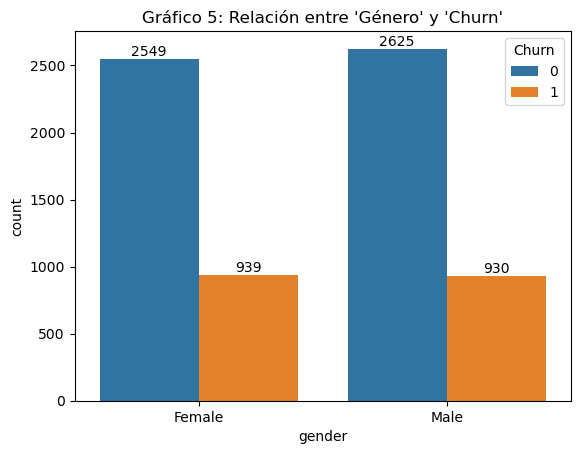

In [25]:
ax = sns.countplot(x = df['gender'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 5: Relación entre 'Género' y 'Churn'")
plt.show()

In [26]:
df.groupby(by='gender').Churn.agg(['mean'])

,mean
gender,
Female,0.269209
Male,0.261603


La variable gender posee dos valores, "Male" y "Female" y sus medias correspondientes son 0.269 y 0.216, es decir, no existe mucha diferencia con la media de la varaible objetivo.

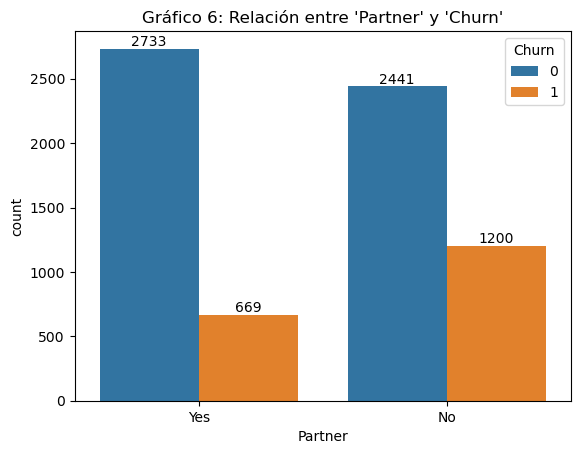

In [27]:
ax = sns.countplot(x = df['Partner'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 6: Relación entre 'Partner' y 'Churn'")
plt.show()

In [28]:
df.groupby(by='Partner').Churn.agg(['mean'])

,mean
Partner,
No,0.329580
Yes,0.196649


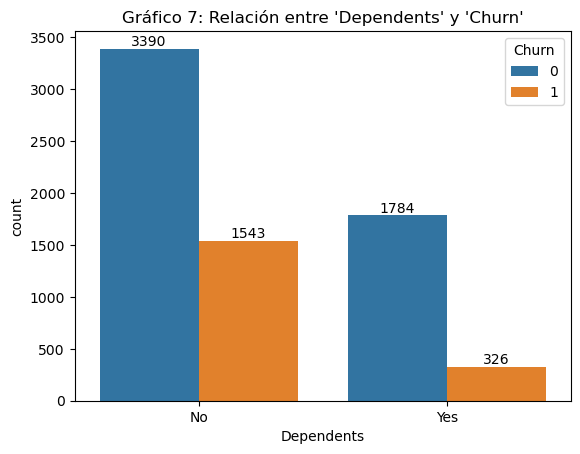

In [29]:
ax = sns.countplot(x = df['Dependents'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 7: Relación entre 'Dependents' y 'Churn'")
plt.show()

In [30]:
df.groupby(by='Dependents').Churn.agg(['mean'])

,mean
Dependents,
No,0.312791
Yes,0.154502


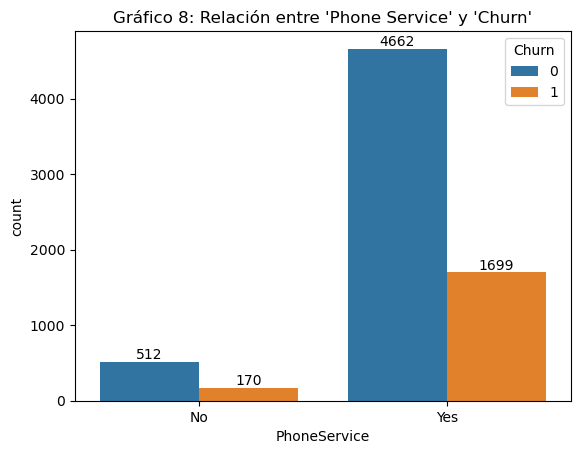

In [31]:
ax = sns.countplot(x = df['PhoneService'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 8: Relación entre 'Phone Service' y 'Churn'")
plt.show()

In [32]:
df.groupby(by='PhoneService').Churn.agg(['mean'])

,mean
PhoneService,
No,0.249267
Yes,0.267096


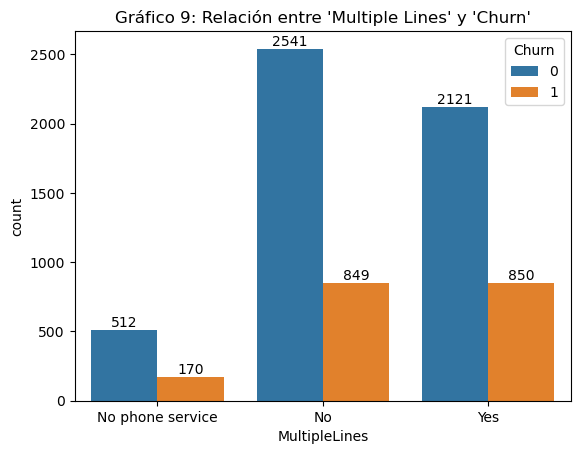

In [33]:
ax = sns.countplot(x = df['MultipleLines'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 9: Relación entre 'Multiple Lines' y 'Churn'")
plt.show()

In [34]:
df.groupby(by='MultipleLines').Churn.agg(['mean'])

,mean
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


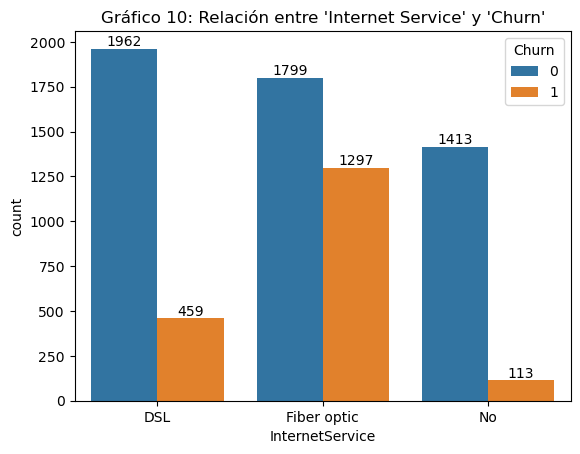

In [35]:
ax = sns.countplot(x = df['InternetService'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 10: Relación entre 'Internet Service' y 'Churn'")
plt.show()

In [36]:
df.groupby(by='InternetService').Churn.agg(['mean'])

,mean
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


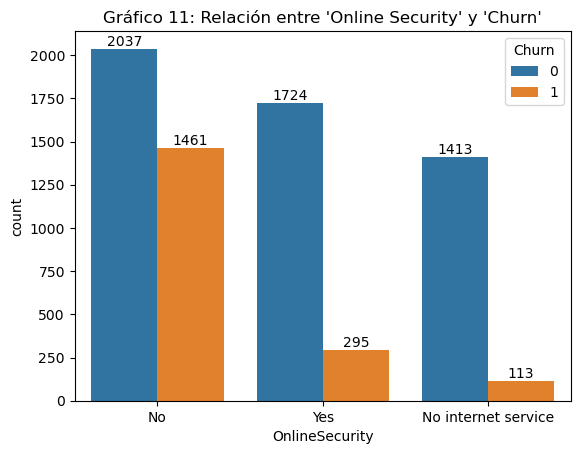

In [37]:
ax = sns.countplot(x = df['OnlineSecurity'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 11: Relación entre 'Online Security' y 'Churn'")
plt.show()

In [38]:
df.groupby(by='OnlineSecurity').Churn.agg(['mean'])

,mean
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


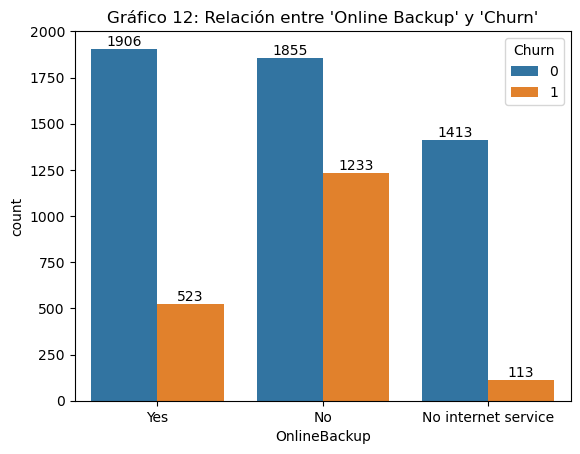

In [39]:
ax = sns.countplot(x = df['OnlineBackup'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 12: Relación entre 'Online Backup' y 'Churn'")
plt.show()

In [40]:
df.groupby(by='OnlineBackup').Churn.agg(['mean'])

,mean
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


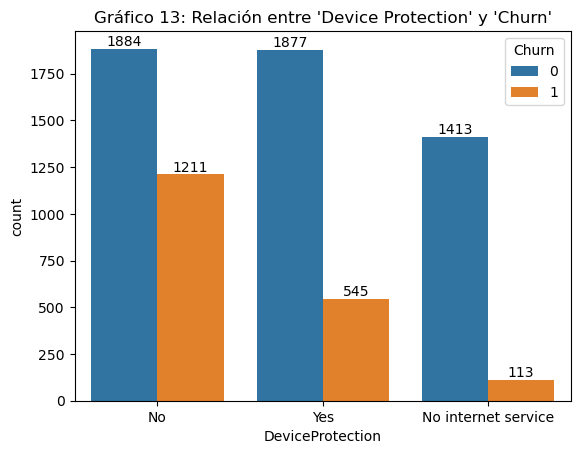

In [41]:
ax = sns.countplot(x = df['DeviceProtection'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 13: Relación entre 'Device Protection' y 'Churn'")
plt.show()

In [42]:
df.groupby(by='DeviceProtection').Churn.agg(['mean'])

,mean
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


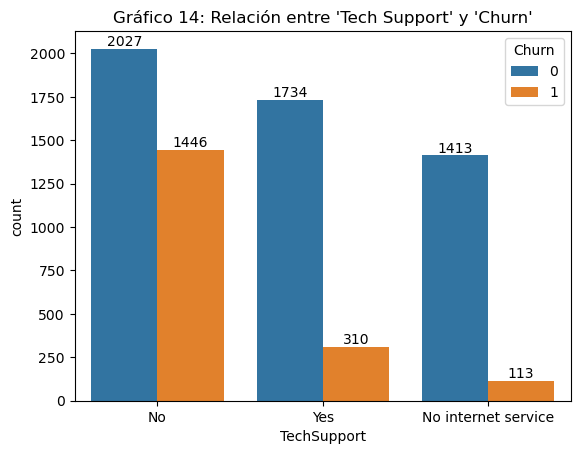

In [43]:
ax = sns.countplot(x = df['TechSupport'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 14: Relación entre 'Tech Support' y 'Churn'")
plt.show()

In [44]:
df.groupby(by='TechSupport').Churn.agg(['mean'])

,mean
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


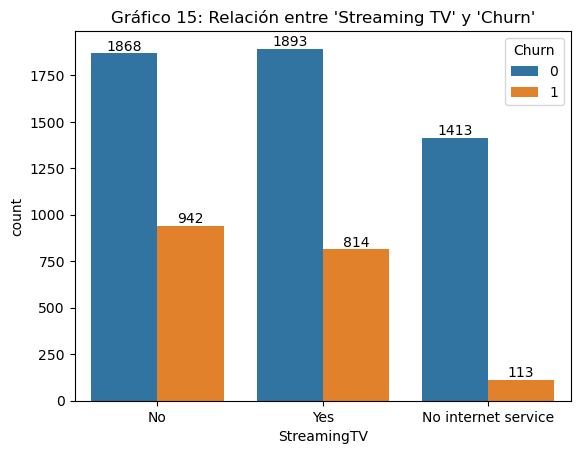

In [45]:
ax = sns.countplot(x = df['StreamingTV'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 15: Relación entre 'Streaming TV' y 'Churn'")
plt.show()

In [46]:
df.groupby(by='StreamingTV').Churn.agg(['mean'])

,mean
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


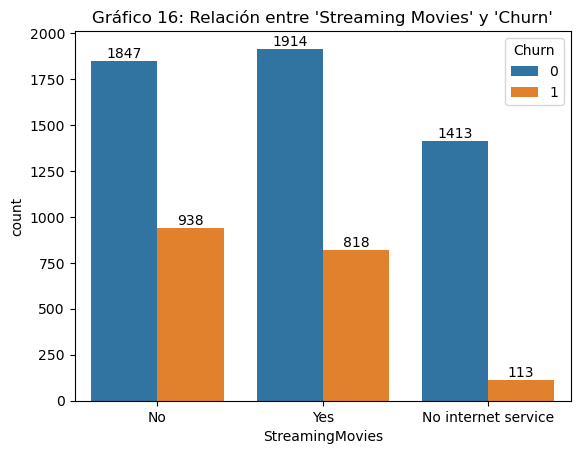

In [47]:
ax = sns.countplot(x = df['StreamingMovies'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 16: Relación entre 'Streaming Movies' y 'Churn'")
plt.show()

In [48]:
df.groupby(by='StreamingMovies').Churn.agg(['mean'])

,mean
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


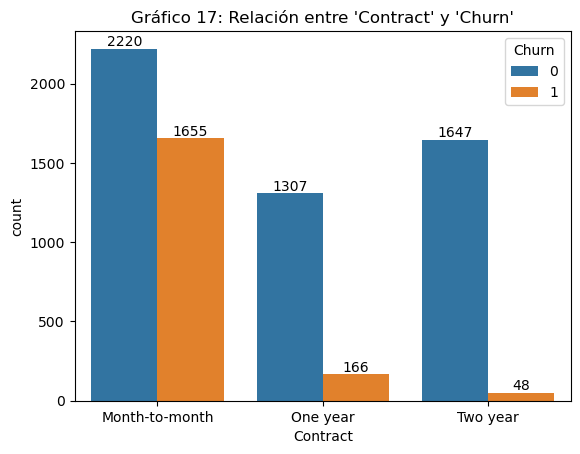

In [49]:
ax = sns.countplot(x = df['Contract'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 17: Relación entre 'Contract' y 'Churn'")
plt.show()

In [50]:
df.groupby(by='Contract').Churn.agg(['mean'])

,mean
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


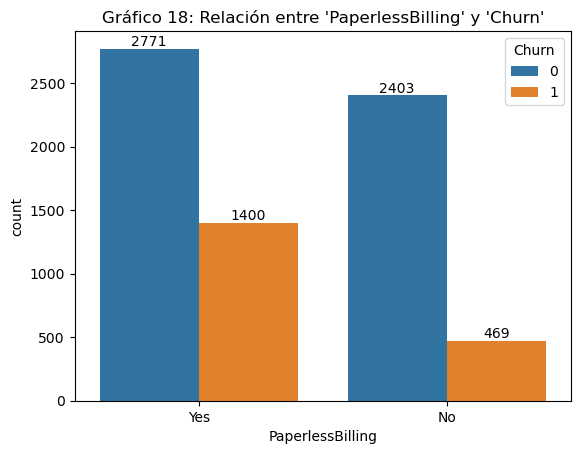

In [51]:
ax = sns.countplot(x = df['PaperlessBilling'], hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 18: Relación entre 'PaperlessBilling' y 'Churn'")
plt.show()

In [52]:
df.groupby(by='PaperlessBilling').Churn.agg(['mean'])

,mean
PaperlessBilling,
No,0.163301
Yes,0.335651


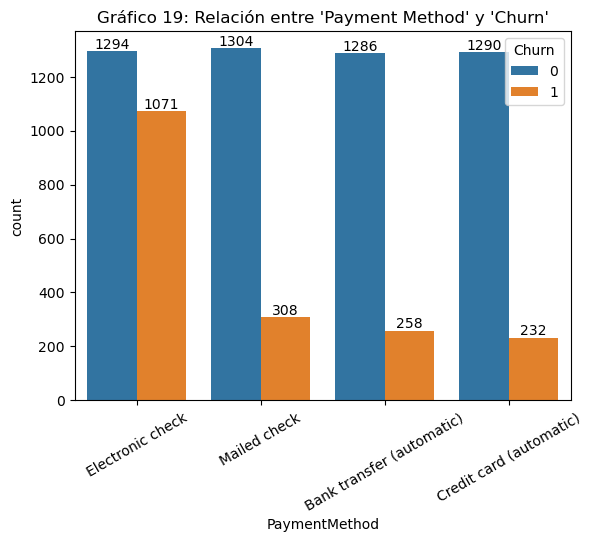

In [53]:
ax = sns.countplot(x = df['PaymentMethod'], hue = df['Churn'])
plt.xticks(rotation=30)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gráfico 19: Relación entre 'Payment Method' y 'Churn'")
plt.show()

In [54]:
df.groupby(by='PaymentMethod').Churn.agg(['mean'])

,mean
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Para las variables cualitativas se han realizado diagramas de frecuencias en función de la tasa de abandono (Churn), dentro de estas, los subgrupos pueden evidenciar diferentes comportamientos. Además, se ha calculado una media para cada variable donde, si el valor se asemeja a la media global, ≈0.265, representa que esta variable no tiene mucho impacto en el resultado final de la tasa de abandono para cliente. Partiendo de esto, se obtiene lo siguiente:
<ul>
    <li>Las personas no jubiladas tienen más probabilidad de abandono que las que sí están jubiladas.
</li>
    <li>La variable "género" parece no tener impacto sobre la tasa de abandono.
</li>
    <li>Tener pareja parece reducir la tasa de abandono.
</li>
    <li>La existencia de dependientes reduce significativamente la tasa de abandono.</li>
    <li>Las personas que poseen servicio telefónico tienen una mayor posibilidad de abandonar.</li>
    <li>Al igual que el género, la existencia de múltiples líneas no genera un impacto en las tasas de abandono.</li>
    <li>En cuanto a los servicios de internet, quienes poseen fibra óptica tienen una alta tendencia a abandonar.</li>
    <li>Los clientes que no cuentan con servicios adicionales, como seguridad en línea, respaldo en línea, soporte técnico, protección de dispositivos, transmisión de TV o transmisión de películas, tienen más probabilidades de abandonar el servicio que los demás.</li>
    <li>Con respecto al tipo de contrato, quienes poseen un contrato de mes a mes presentan una tendencia alta al abandono.</li>
    <li>Los clientes con facturación electrónica (PaperlessBilling) parecen abandonar más que los otros.</li>
    <li>De los métodos de pago, el método de cheque electrónico tiene la tasa de abandono más alta.</li>
</ul>


La media de esta variable es de 0.27, es decir, los datos no se encuentran balanceados, evidenciando que existen una mayoría de casos donde el abandono es de "0", correspondiente a "No". Partiendo de lo anterior, la tasa de abandono es del 27%.

## Tasa de riesgo

La tasa de riesgo es la relación entre probabilidades en diferentes grupos. Ese riesgo equivale a la posibilidad de que ocurra un efecto, en este caso, la tasa de abandono. Si la diferencia entre la tasa grupal y la tasa global es pequeña, el riesgo será cercano a 1. Por lo tanto, en este caso, es tan probable que los clientes del grupo abandonen como cualquier otra persona. Si el riesgo es inferior a 1, el grupo tiene menores riesgos. Por el contrario, si el valor es superior a 1, hay más abandono en el grupo que en la población.

In [55]:
for i in categoricas:
    dfGrupo = df.groupby(by=i).Churn.agg(['mean']) 
    dfGrupo['Diferencia'] = dfGrupo['mean'] - mediaGlobal 
    dfGrupo['Tasa'] = dfGrupo['mean'] / mediaGlobal
    dfGrupo.rename(columns={'mean':'Media'}, inplace = True)
    display(dfGrupo) 

,Media,Diferencia,Tasa
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,Media,Diferencia,Tasa
SeniorCitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,Media,Diferencia,Tasa
Partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,Media,Diferencia,Tasa
Dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,Media,Diferencia,Tasa
PhoneService,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,Media,Diferencia,Tasa
MultipleLines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,Media,Diferencia,Tasa
InternetService,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,Media,Diferencia,Tasa
OnlineSecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,Media,Diferencia,Tasa
OnlineBackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,Media,Diferencia,Tasa
DeviceProtection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,Media,Diferencia,Tasa
TechSupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,Media,Diferencia,Tasa
StreamingTV,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,Media,Diferencia,Tasa
StreamingMovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,Media,Diferencia,Tasa
Contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,Media,Diferencia,Tasa
PaperlessBilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,Media,Diferencia,Tasa
PaymentMethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


El código anterior muestra la tasa de riesgo para cada grupo de cada variable del conjunto de datos, donde se evidencia que:

<ul>
    <li>En cuanto al género, las medias tienen cierta similitud con la media global, por ende, el riesgo es cercano a 1.</li>
    <li>Los jubilados tienden a abandonar más que los no mayores.</li>
    <li>Las personas con pareja abandonan menos que las personas sin pareja.</li>
    <li>Las personas que usan el servicio telefónico no corren el riesgo de abandonar.</li>
    <li>Los clientes sin soporte técnico tienden a abandonar más que aquellos que sí lo tienen.</li>
    <li>Las personas con contratos mensuales cancelan el contrato con mucha más frecuencia que otras.</li>
</ul>


## Información mutua

La información mutua es una métrica empleada para medir el grado de dependencia entre las variables categóricas. En este caso, se puede medir el grado de dependencia entre una variable categórica y la variable objetivo. Si dos variables son dependientes, conocer el valor de una variable brindará información sobre la otra. Por otro lado, si una variable es completamente independiente de la variable de destino, no es útil y puede eliminarse de forma segura del conjunto de datos. Valores más altos de información mutua significan un mayor grado de dependencia, así, esta variable sería elemental para realizar la predicción.

In [56]:
def calculoIM(series):
    return mutual_info_score(series, df.Churn) 

In [57]:
dfIM = df[categoricas].apply(calculoIM) 
dfIM = dfIM.sort_values(ascending=False).to_frame(name='IM')

In [58]:
dfIM

,IM
Contract,0.098453
OnlineSecurity,0.064677
TechSupport,0.063021
InternetService,0.055574
OnlineBackup,0.046792
PaymentMethod,0.044519
DeviceProtection,0.043917
StreamingMovies,0.032001
StreamingTV,0.031908
PaperlessBilling,0.019194


Según la información anterior, el contrato, la seguridad en línea y el soporte técnico se encuentran entre las características más importantes del conjunto de datos con respecto a la variable objetivo.

## Coeficiente de correlación

Para medir la dependencia entre variables cuantitativas, uno de los métodos a emplear es el coeficiente de correlación.

In [59]:
df[numericas].corrwith(df.Churn) 

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
dtype: float64

In [60]:
data2 = df.copy()

In [61]:
condicionTenure = [
    (data2['tenure'] <= 2),
    (data2['tenure'] >= 3) & (data2['tenure'] <= 12),
    (data2['tenure'] > 12)
    ]

In [62]:
valoresTenure = ['0-2', '3-12', '>12']

In [63]:
data2['Tenure'] = np.select(condicionTenure, valoresTenure)

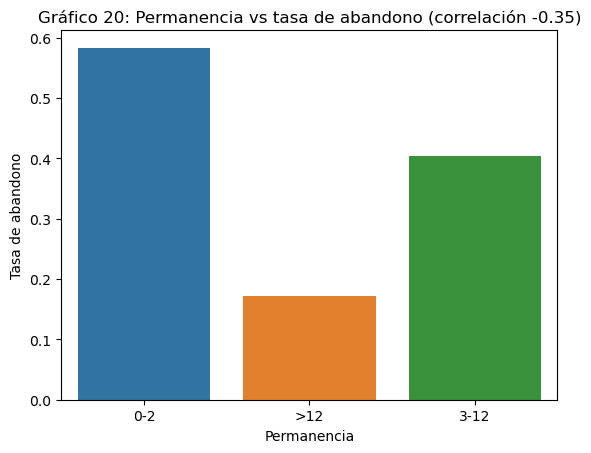

In [64]:
sns.barplot(data = data2, x = 'Tenure', y = 'Churn', errorbar = None)
plt.title('Gráfico 20: Permanencia vs tasa de abandono (correlación -0.35)')
plt.xlabel('Permanencia')
plt.ylabel('Tasa de abandono')
plt.show()

In [65]:
condicionMonthly = [
    (data2['MonthlyCharges'] < 21),
    (data2['MonthlyCharges'] >= 21) & (data2['MonthlyCharges'] <= 50),
    (data2['MonthlyCharges'] > 50)
    ]

In [66]:
valoresMonthly = ['0-20', '21-50', '>50']

In [67]:
data2['Monthly charges'] = np.select(condicionMonthly, valoresMonthly)

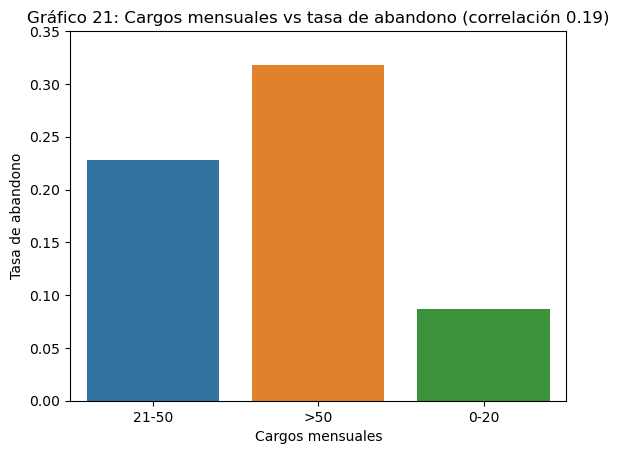

In [68]:
sns.barplot(data = data2, x = 'Monthly charges', y = 'Churn', errorbar = None)
plt.title('Gráfico 21: Cargos mensuales vs tasa de abandono (correlación 0.19)')
plt.xlabel('Cargos mensuales')
plt.ylabel('Tasa de abandono')
plt.ylim(0, 0.35)
plt.show()

En cuanto a las variable cuantitativas se obtiene que:
    
<ul>
    <li>La correlación entre permanencia y abandono es -0,35, es decir, cuanto más tiempo se queden los clientes, menos tienden a abandonar. Para quienes permanecen en la empresa durante dos meses o menos, la tasa de abandono es, aproximadamente, del 60 %; para clientes con antigüedad entre 3 y 12 meses, la tasa de abandono es del 40%; y para los clientes que se quedan más de un año, la tasa de abandono no supera el 20%. </li>
    <li>Con respecto a los cargos mensuales, existe una correlación positiva de 0.19 con la tasa de abandono, lo que significa que los clientes que pagan más tienden a irse más seguido. Para valores más altos, la tasa de abandono es más alta.</li>
</ul>

# Modelado

En ciertas variables categóricas, uno de los posibles resultados tiene relación con otra variable, por ejemplo en lo referente a múltiples líneas, los resultados serían "No", "Sí" y "Sin servicio de internet". El último resultado antecede a la variable relacionada al servicio de internet, por esta razón, se deduce que esta respuesta equivale a un "No". A continuación, se hará un reemplazo de estos valores.

In [69]:
df.replace({"No phone service": 'No', "No internet service": 'No'}, inplace = True)

In [70]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Una vez realizado este reemplazo, se necesitará que todas las variables estén en un formato numérico para poder crear el modelo. En este caso, se aplicará el método One Hot Encoding.

In [71]:
dfModel = df.copy()

In [72]:
for col in categoricas:
    dfModel = pd.concat([dfModel, (pd.get_dummies(dfModel[col]))], axis=1)
    dfModel.drop(columns=[col], inplace=True)

In [73]:
dfModel.head(6)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Female,Male,0,1,No,Yes,No,Yes,No,Yes,No,Yes,DSL,Fiber optic,No,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,8,99.65,820.50,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0


Una vez realizado este proceso, lo siguiente es estandarizar los datos de las variables cuantitativas debido a que, al haber una diferencia alta entre sus rangos de valor, se podría generar un sesgo.

In [74]:
scaler = preprocessing.StandardScaler()

In [75]:
ds = scaler.fit_transform(dfModel[numericas])

In [76]:
ds = pd.DataFrame(ds, columns=numericas)

In [77]:
dfModel.drop(numericas, axis=1, inplace=True)

In [78]:
dfModel = pd.concat([dfModel, ds], axis=1)

In [79]:
dfModel.drop(['customerID'], axis=1, inplace = True)

In [80]:
dfModel.head(3)

,Churn,Female,Male,0,1,No,Yes,No,Yes,No,Yes,No,Yes,DSL,Fiber optic,No,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,Month-to-month,One year,Two year,No,Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,-1.277445,-1.160323,-0.992611
1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172165
2,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,-1.236724,-0.362660,-0.958066


De esta manera, se procede a realizar la creación del modelo. Primero, se empleará la regresión logística.

## Regresión logística

In [81]:
X = dfModel.drop(['Churn'],axis=1).values
y = dfModel['Churn'].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [83]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear')

In [84]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [85]:
y_pred = lr.predict(X_test)

In [86]:
metrics.accuracy_score(y_pred, y_test)

0.8218594748048261

In [87]:
lr2 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

In [88]:
lr2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [89]:
y_pred2 = lr2.predict(X_test)

In [90]:
metrics.accuracy_score(y_test, y_pred2)

0.8225691980127751

Uno de los problemas que puede haber en la creación de un modelo es el sobreajuste (overfitting), para esto, se emplea la regularización, penalizando a los coeficientes del mismo. En el primer caso, se empleó l2 (penalización Ridge), que presentó una exactitud (accuracy) de ~0.822, no obstante, al usar l1 (penalización Lasso), el modelo presenta una leve mejora.

### Matriz de confusión

In [91]:
metrics.confusion_matrix(y_test, y_pred2)

array([[935, 101],
       [149, 224]], dtype=int64)

El umbrar asumido para este modelo es de 0.5, esto significa que cualquier muestra con una probabilidad prevista de al menos 0.5 puede identificarse como positiva (en este caso, favorable a la tasa de abandono) y cualquier muestra con una probabilidad prevista menos a este valor se considera negativa. 

In [92]:
y_pred_proba = lr2.predict_proba(X_test)

In [93]:
prob_sum = np.sum(y_pred_proba,1)

In [94]:
prob_sum.shape

(1409,)

In [95]:
pos_proba = y_pred_proba[:,1]

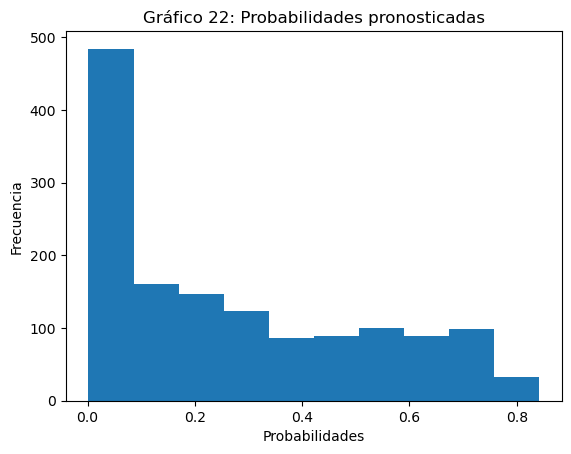

In [96]:
plt.hist(pos_proba)
plt.title('Gráfico 22: Probabilidades pronosticadas')
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico puede observarse que la mayoría de las probabilidades pronosticadas están por debajo del umbral determinado anteriormente. Entonces, bajar el umbral podría mejorar el rendimiento del clasificador.

In [97]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

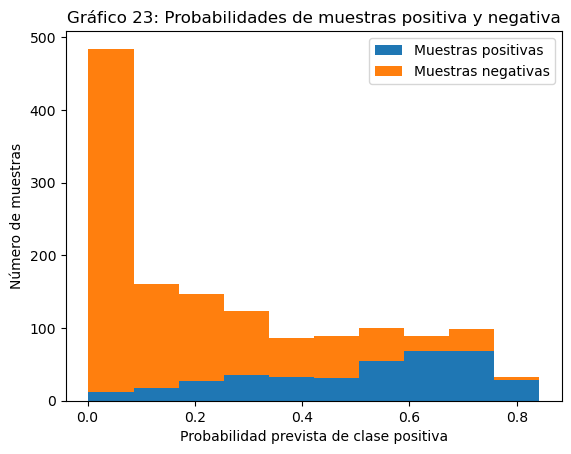

In [98]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Muestras positivas', 'Muestras negativas'])
plt.title('Gráfico 23: Probabilidades de muestras positiva y negativa')
plt.xlabel('Probabilidad prevista de clase positiva')
plt.ylabel('Número de muestras')
plt.show()

La gráfica anterior muestra las etiquetas verdaderas de las muestras para cada probabilidad predicha. Si bien es cierto, reducir el umbral parecería ser una opción factible, casi todas las muestras ubicadas en la sección izquierda son muestras negativas, entonces, al emplear un umbral menor, esto podría disminuir el rendimiento del modelo. Un método que permite visualizar y determinar si la reducción del umbral sería una opción correcta es la curva ROC.

In [99]:
fpr, tpr, umbrales = metrics.roc_curve(y_test, pos_proba)

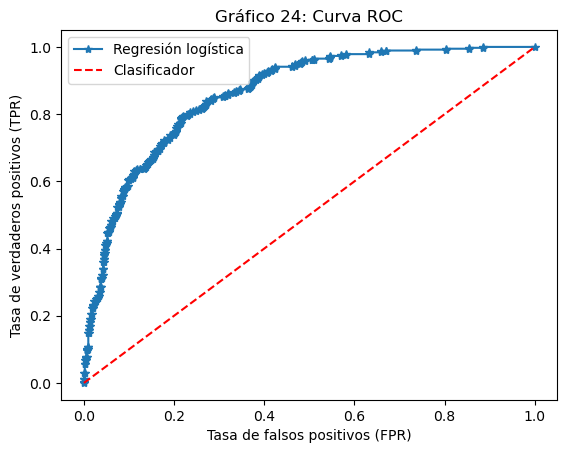

In [100]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Regresión logística', 'Clasificador'])
plt.title('Gráfico 24: Curva ROC')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.show()

De esta manera, es evidente que emplear un umbral de 0.5 es aceptable en el clasificador creado, puesto que, la curva ROC tiende a  acercarse a un clasificador de alto rendimiento.

In [101]:
umbrales

array([1.84213736e+00, 8.42137361e-01, 8.17458288e-01, 8.13618434e-01,
       7.87793437e-01, 7.84497127e-01, 7.68700092e-01, 7.68201840e-01,
       7.63499018e-01, 7.62574132e-01, 7.61226357e-01, 7.56458964e-01,
       7.55150756e-01, 7.51564694e-01, 7.37201188e-01, 7.37095428e-01,
       7.35975670e-01, 7.35665684e-01, 7.35487291e-01, 7.34287832e-01,
       7.34068088e-01, 7.32893069e-01, 7.22837951e-01, 7.22179622e-01,
       7.20091719e-01, 7.19194979e-01, 7.16389532e-01, 7.15902043e-01,
       7.13178120e-01, 7.12966865e-01, 7.04012241e-01, 7.02462166e-01,
       6.99179058e-01, 6.97406440e-01, 6.91493942e-01, 6.91455426e-01,
       6.90954661e-01, 6.89844294e-01, 6.89666930e-01, 6.89579147e-01,
       6.87014283e-01, 6.80673373e-01, 6.78393798e-01, 6.77336809e-01,
       6.76798128e-01, 6.75415954e-01, 6.74568439e-01, 6.73890140e-01,
       6.71668973e-01, 6.68569931e-01, 6.64039425e-01, 6.61814326e-01,
       6.60779655e-01, 6.58778466e-01, 6.53242509e-01, 6.52529627e-01,
      

In [102]:
metrics.roc_auc_score(y_test, pos_proba)

0.8621826058153135

El gráfico 24 denota una curva ROC (sensibilidad frente a la especificidad) aceptable, cuya curva se acerca a un clasificador perfecto. Al obtener este valor, el resultado muestra un 0.86. No obstante, aunque este valor resulte adecuado para el modelo, es necesario emplear otras métricas para su respectiva evaluación, por ejemplo, la precisión, que es la proporción de predicciones positivas que son correctas.

In [103]:
metrics.precision_score(y_test, y_pred2)

0.6892307692307692

In [104]:
metrics.f1_score(y_test, y_pred2)

0.6418338108882521

La precisión de nuestro modelo no refleja tanta diferencia con respecto a la exactitud. A pesar de que a mayor exactitud puede haber menos precisión, una métrica que mejora el entendimiento del modelo es F1 Score que combina ambas métricas mencionadas anteriormente. Esta métrica permite conocer cuál es el rendimiento de un modelo que posee datos no balanceados, como el del presente estudio. En este caso, la puntuación f1 de nuestro modelo, al emplear, la regresión logística, es de ~0.64.

In [105]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



A continuación, se procede a realizar la validación cruzada.

In [106]:
training_score = cross_val_score(lr2, X_train, y_train, cv=5, scoring = "precision")

In [107]:
round(training_score.mean(), 2) * 100

65.0

Al aplicar validación cruzada, se evidencia una disminuición en el rendimiento del modelo, de acuerdo con la métrica de precisión. Cabe recalcar que, hasta el momento, se ha creado el modelo con datos que no se encuentran balanceados, por ende, se procede a balancear los mismos aplicando la técnica de sobremuestreo de minorías sintéticas (SMOTE). 

In [108]:
over = SMOTE(sampling_strategy = 1)

In [109]:
X, y = over.fit_resample(X, y)

In [110]:
Counter(y)

Counter({0: 5174, 1: 5174})

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [112]:
resultados = cross_validate(lr2, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

In [114]:
print(f"Exactitud: {round(resultados['test_accuracy'].mean(), 4)}")
print(f"AUC: {round(resultados['test_roc_auc'].mean(), 4)}")
print(f"Precisión: {round(resultados['test_precision'].mean(), 4)}")
print(f"F1: {round(resultados['test_f1'].mean(), 4)}")

Exactitud: 0.7733
AUC: 0.8553
Precisión: 0.7517
F1: 0.7826


Una vez balanceados los datos, se evidencia que métricas como la exactitud presentan un decrecimiento, mas, el valor aun es óptimo y, al observar la puntuación F1, existe una notable mejora con respecto al modelo, lo que evidencia un buen rendimiento del mismo.

# Conclusiones

<ul>
    <li>El análisis exploratorio permitió evidenciar variables categóricas y numéricas, así como su relación con la variable de respuesta, la tasa de abandono. En cuanto a variables numéricas, resalta la variable relacionada a la permanencia e los clientes, la misma que posee una media de 32 meses. Algunas de las variables categóricas se encuentran limitadas por el servicio de telefonía y de internet que puede tener el cliente. Entre los conceptos estadísticos empleados están la tasa de riesgo y la información mutua, mediantes los cuales se identificó </li>
    <li>El análisis bivariado permitió determinar aspectos referentes a la tasa de abandono, por ejemplo, en cuanto a los servicios, quienes no poseen servicios adicionales tienden a abandonar más que los que sí poseen. Algunas variables como el género y la existencia de múltiples líneas, no generan un impacto significativo para decir si el cliente abandonorá o no.</li>
    <li>Se logró crear un modelo de regresión logística para predecir el abandono de los clientes. Este modelo aplicó regularización por medio de la penalización Lasso. Para esto, se empleó One Hot Encoding en las variables categóricas para poder tratarlas numéricamente, mientras que, para disminuir la diferencia en las escalas de las variables numéricas, se usó el proceso de estandarización. </li>
    <li>El rendimiento del modelo se evaluó mediante métricas como exactitud, precisión, e incluso, se aplicó la puntuación F1. Esta última permitió determinar el rendimiento de manera más óptima, puesto que, se emplea para tratar datos desbalanceados. Para aumentar el porcentaje del mismo, se realizó el balanceamiento de los datos mediante la técnica de sobremuestreo de minorías sintéticas lo que permitió obtener, aproximadamente, una exactitud de 0.77 y una puntuación F1 de 0.78.</li>
</ul>